Get some basic packages for data analysis and plotting

In [ ]:
import os
import shutil
import glob
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import colormaps
from matplotlib import colors
import cartopy as cp
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from IPython.display import display, Image, clear_output
import time

List the scenarios picked from SDL

In [2]:
!pwd

/home/nrr/projects/dataset-catania-siracusa/notebooks/6_ml_application/tsu-inundation-emulator


In [6]:
data_path = '../../../sample_data/CT-SR_M100' 

# list all scenario subdirectories under data_path
scenario_path = glob.glob(os.path.join(data_path, '*', '*/'))
for path in scenario_path:
    print(path)


../../../sample_data/CT-SR_M100/BS_002/E01470N3877E01631N3641-BS-M680_E01579N3692_D010_S067D50R270_A000638_S009/
../../../sample_data/CT-SR_M100/BS_002/E01267N3753E01646N3535-BS-M809_E01592N3602_D010_S067D50R090_A006995_S075/
../../../sample_data/CT-SR_M100/BS_001/E01470N3877E01631N3641-BS-M680_E01579N3692_D010_S067D50R270_A000638_S009/
../../../sample_data/CT-SR_M100/BS_001/E01522N3585E03578N2685-BS-M809_E01585N3557_D010_S067D50R090_A006995_S075/
../../../sample_data/CT-SR_M100/PS_001/E01517N3917E01678N3772-PS-Mur_PNo_Hom-M707_E01550N3812_S000/
../../../sample_data/CT-SR_M100/PS_001/E01517N3917E01678N3772-PS-Mur_PNo_Hom-M732_E01550N3812_S000/
../../../sample_data/CT-SR_M100/SIMULATION_SETUP/bati/


Alternatively create a model from about 4096 scenarios available locally, later to be updated with datastructure of SDL or API based reading

In [9]:
temp_path = '/home/nrr/NGI/P/2022/02/20220296/Calculations/temp_emulator'
ts_path = glob.glob(os.path.join(temp_path, '*_ts.nc'))
CT_path = glob.glob(os.path.join(temp_path, '*_CT_10m.nc'))
SR_path = glob.glob(os.path.join(temp_path, '*_SR_10m.nc'))
scenario_name = [np.array(os.path.split(path)[-1][:-6]) for path in ts_path]

# Create a DataFrame with scenario names, nc files paths

df_paths = pd.DataFrame({
    'scenario_name': scenario_name,
    'ts_path': ts_path,
    'CT_path': CT_path,
    'SR_path': SR_path
})

print(df_paths.head(2))

                                       scenario_name  \
0  2367_E02020N3739E02658N3366-PS-Str_PYes_Var-M8...   
1  2287_E01548N3896E01854N3659-PS-Mur_PYes_Hom-M7...   

                                             ts_path  \
0  /home/nrr/NGI/P/2022/02/20220296/Calculations/...   
1  /home/nrr/NGI/P/2022/02/20220296/Calculations/...   

                                             CT_path  \
0  /home/nrr/NGI/P/2022/02/20220296/Calculations/...   
1  /home/nrr/NGI/P/2022/02/20220296/Calculations/...   

                                             SR_path  
0  /home/nrr/NGI/P/2022/02/20220296/Calculations/...  
1  /home/nrr/NGI/P/2022/02/20220296/Calculations/...  


Lets read a scernario file and check the data


In [10]:
ds_CT = xr.open_dataset(CT_path[0])
print(ds_CT)

<xarray.Dataset> Size: 41MB
Dimensions:       (lon: 912, lat: 2224, grid_lon: 912, grid_lat: 2224, time: 2)
Coordinates:
  * lon           (lon) float64 7kB 15.02 15.02 15.02 ... 15.13 15.13 15.13
  * lat           (lat) float64 18kB 37.31 37.31 37.31 ... 37.51 37.51 37.51
  * grid_lon      (grid_lon) float64 7kB 15.02 15.02 15.02 ... 15.13 15.13 15.13
  * grid_lat      (grid_lat) float64 18kB 37.31 37.31 37.31 ... 37.51 37.51
  * time          (time) datetime64[ns] 16B 1970-01-01 1970-01-01T04:00:00.60...
Data variables:
    deformation   (grid_lat, grid_lon) float32 8MB ...
    max_height    (lat, lon) float32 8MB ...
    max_mom_flux  (lat, lon) float32 8MB ...
    u             (time, lat, lon) float32 16MB ...
Attributes: (12/617)
    Conventions:                    CF-1.0
    title:                          Tsunami-HySEA model output
    Tsunami-HySEA_version:          3.7.0
    creator_name:                   EDANYA Group
    institution:                    University of Malaga


In [11]:
ds_SR = xr.open_dataset(SR_path[0])
print(ds_SR)

<xarray.Dataset> Size: 25MB
Dimensions:       (lon: 1300, lat: 948, grid_lon: 1300, grid_lat: 948, time: 2)
Coordinates:
  * lon           (lon) float64 10kB 15.2 15.2 15.2 15.2 ... 15.34 15.34 15.34
  * lat           (lat) float64 8kB 37.0 37.0 37.0 37.0 ... 37.08 37.08 37.08
  * grid_lon      (grid_lon) float64 10kB 15.2 15.2 15.2 ... 15.34 15.34 15.34
  * grid_lat      (grid_lat) float64 8kB 37.0 37.0 37.0 ... 37.08 37.08 37.08
  * time          (time) datetime64[ns] 16B 1970-01-01 1970-01-01T04:00:00.60...
Data variables:
    deformation   (grid_lat, grid_lon) float32 5MB ...
    max_height    (lat, lon) float32 5MB ...
    max_mom_flux  (lat, lon) float32 5MB ...
    u             (time, lat, lon) float32 10MB ...
Attributes: (12/617)
    Conventions:                    CF-1.0
    title:                          Tsunami-HySEA model output
    Tsunami-HySEA_version:          3.7.0
    creator_name:                   EDANYA Group
    institution:                    University of Mal

In [12]:
ds_ts = xr.open_dataset(ts_path[0])
print(ds_ts)

<xarray.Dataset> Size: 508kB
Dimensions:         (grid_npoints: 87, time: 481)
Coordinates:
  * time            (time) datetime64[ns] 4kB 1970-01-01 ... 1970-01-01T04:00...
Dimensions without coordinates: grid_npoints
Data variables:
    deformed_bathy  (grid_npoints) float32 348B ...
    longitude       (grid_npoints) float64 696B ...
    latitude        (grid_npoints) float64 696B ...
    min_height      (grid_npoints) float32 348B ...
    max_height      (grid_npoints) float32 348B ...
    eta             (time, grid_npoints) float32 167kB ...
    ux              (time, grid_npoints) float32 167kB ...
    uy              (time, grid_npoints) float32 167kB ...
Attributes: (12/616)
    Conventions:                    CF-1.0
    title:                          Time series output of Tsunami-HySEA model
    Tsunami-HySEA_version:          3.7.0
    creator_name:                   EDANYA Group
    institution:                    University of Malaga
    comments:                       No 

In [21]:
ds_topo_CT = xr.open_dataset('../../../sample_data/CT-SR_M100/SIMULATION_SETUP/bati/C_CT.grd')
print(ds_topo_CT)

<xarray.Dataset> Size: 8MB
Dimensions:  (x: 912, y: 2224)
Coordinates:
  * x        (x) float64 7kB 15.02 15.02 15.02 15.02 ... 15.12 15.13 15.13 15.13
  * y        (y) float64 18kB 37.31 37.31 37.31 37.31 ... 37.51 37.51 37.51
Data variables:
    z        (y, x) float32 8MB ...
Attributes:
    Conventions:  COARDS/CF-1.0
    title:        Grid originally in Surfer 7 format
    history:      grdreformat CT_10_NN.grd C_CT.grd=nf
    GMT_version:  4.5.0 [64-bit]


In [22]:
ds_topo_SR = xr.open_dataset('../../../sample_data/CT-SR_M100/SIMULATION_SETUP/bati/C_SR.grd')
print(ds_topo_SR)

<xarray.Dataset> Size: 5MB
Dimensions:  (x: 1300, y: 948)
Coordinates:
  * x        (x) float64 10kB 15.2 15.2 15.2 15.2 ... 15.34 15.34 15.34 15.34
  * y        (y) float64 8kB 37.0 37.0 37.0 37.0 ... 37.08 37.08 37.08 37.08
Data variables:
    z        (y, x) float32 5MB ...
Attributes:
    Conventions:  COARDS/CF-1.0
    title:        Grid originally in Surfer 7 format
    history:      grdreformat SR_10m_NN.grd C_SR.grd=nf
    GMT_version:  4.5.0 [64-bit]


Coverage of the data

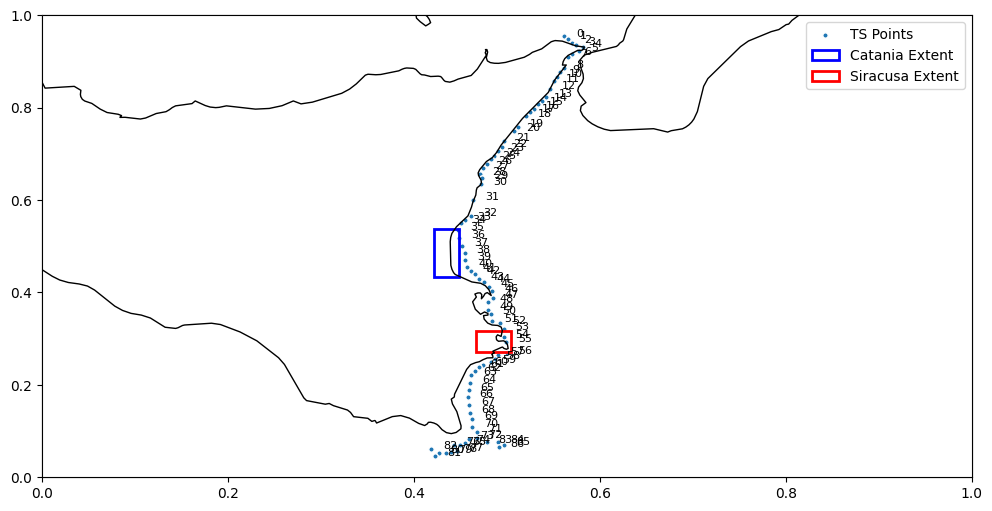

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
#plot locations of ts points and extent of inundation sites of Catania and Siracusa
ax = plt.axes(projection=ccrs.PlateCarree())
ex_CT = [ds_CT.lon.min(), ds_CT.lon.max(), ds_CT.lat.min(), ds_CT.lat.max()]
ex_SR = [ds_SR.lon.min(), ds_SR.lon.max(), ds_SR.lat.min(), ds_SR.lat.max()]
ds_ts.plot.scatter(x='longitude', y='latitude', s=15, ax=ax, transform=ccrs.PlateCarree(),label='TS Points')

#annotate the poi nos
for pt in ds_ts.grid_npoints:
    pt = int(pt)
    ax.text(ds_ts.longitude[pt]+0.05, ds_ts.latitude[pt], str(pt), fontsize=8, transform=ccrs.PlateCarree())

#plot extent of inundation sites as rectangles
ax.add_patch(plt.Rectangle((ex_CT[0], ex_CT[2]), ex_CT[1] - ex_CT[0], ex_CT[3] - ex_CT[2],
                          fill=None, edgecolor='blue', linewidth=2, label='Catania Extent'))
ax.add_patch(plt.Rectangle((ex_SR[0], ex_SR[2]), ex_SR[1] - ex_SR[0], ex_SR[3] - ex_SR[2],
                          fill=None, edgecolor='red', linewidth=2, label='Siracusa Extent'))

ax.coastlines(resolution='10m')
plt.legend()
plt.axis('equal')
plt.show()

Plot for one event info

Text(0.5, 0, 'Time (hours)')

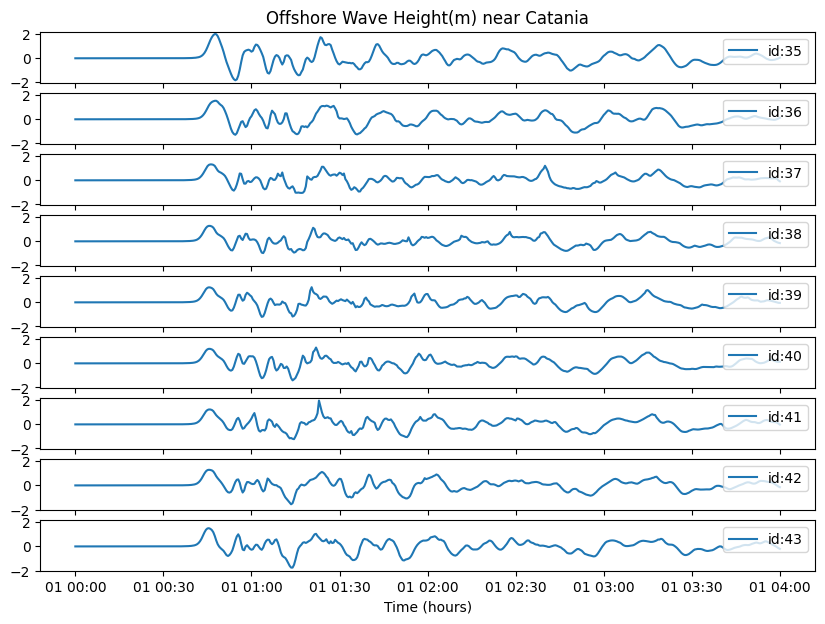

In [15]:
#time series data
fig, ax = plt.subplots(9, 1, figsize=(10, 7),sharex=True,sharey=True)
for i in range(35,44):
    ax[i-35].plot(ds_ts.time,ds_ts.eta[:,i],label = f'id:{i}')
    ax[i-35].legend(loc='upper right') 
ax[0].set_title(f'Offshore Wave Height(m) near Catania')
ax[8].set_xlabel('Time (hours)')

(np.float64(15.0216989824),
 np.float64(15.125397742246761),
 np.float64(37.3102965037),
 np.float64(37.510667748552166))

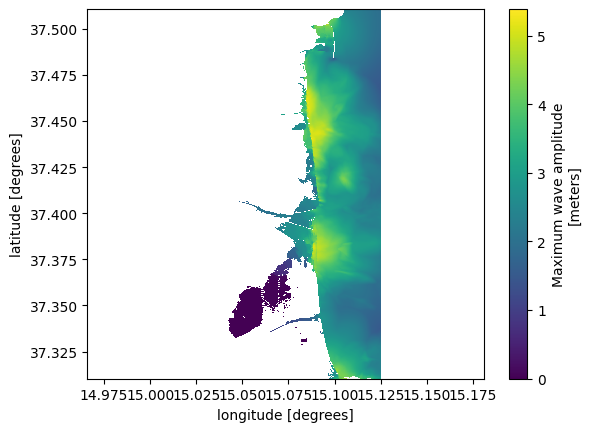

In [16]:
ds_CT.max_height.plot()
plt.axis('equal')

(np.float64(15.0216989824),
 np.float64(15.125397742246761),
 np.float64(37.3102965037),
 np.float64(37.510667748552166))

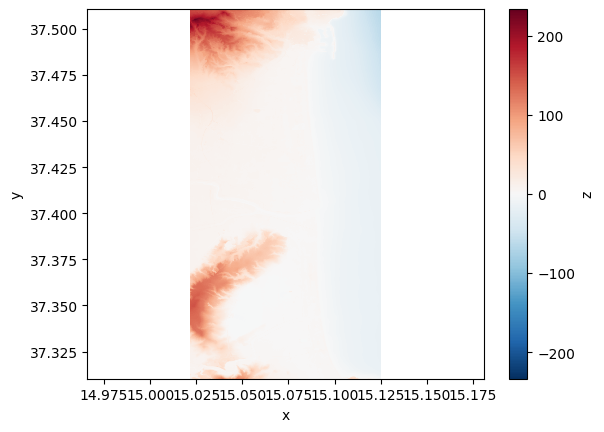

In [23]:
ds_topo_CT.z.plot()
plt.axis('equal')

(np.float64(15.1963495253),
 np.float64(15.344165739993844),
 np.float64(36.998928238299996),
 np.float64(37.08433828331792))

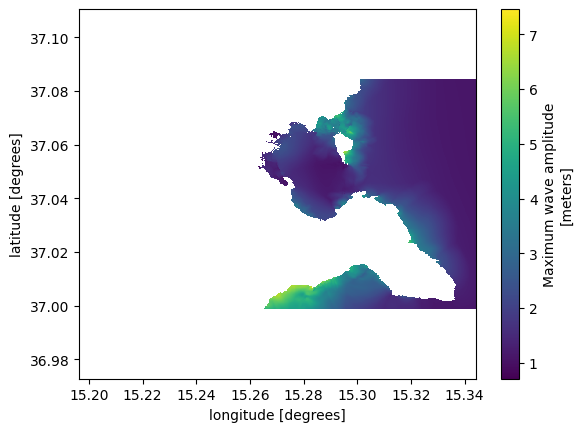

In [17]:
ds_SR.max_height.plot()
plt.axis('equal')

(np.float64(15.1963495253),
 np.float64(15.344165739993844),
 np.float64(36.998928238299996),
 np.float64(37.08433828331792))

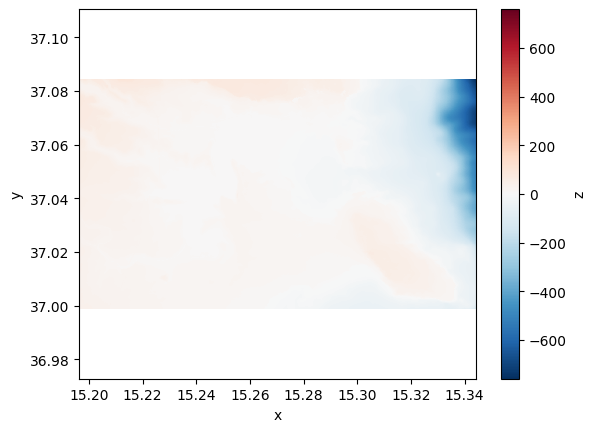

In [24]:
ds_topo_SR.z.plot()
plt.axis('equal')

Lets calculate the max offshore wave height of Catania at poi 38

In [38]:
from concurrent.futures import ProcessPoolExecutor
import xarray as xr

poi_interest = 38  # Example point of interest

def compute_max(ts_path):
    ds = xr.open_dataset(ts_path)
    return ds.eta[:, poi_interest].max().values.item()

with ProcessPoolExecutor() as executor:
    df_paths['max_off'] = list(executor.map(compute_max, df_paths['ts_path']))


We will use the square of max offshore wave height as selection criteria for scenarios to prioritize the larger events